![](https://snag.gy/h9Xwf1.jpg)

<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">


# Introduction to Pandas


*Instructor: Aymeric Flaisler*
___

Pandas is the most popular Python package for managing data sets. It's used extensively by data scientists.

### Learning Objectives

- Define the anatomy of DataFrames.
- Explore data with DataFrames.
- Practice plotting with pandas.

### Lesson Guide

- [Introduction to `pandas`](#introduction)
- [Loading CSV Files](#loading_csvs)
- [Exploring Your Data](#exploring_data)
- [Data Dimensions](#data_dimensions)
- [DataFrames vs. Series](#dataframe_series)
- [Using the `.info()` Function](#info)
- [Using the `.describe()` Function](#describe)
- [Independent Practice](#independent_practice)
- [Pandas Indexing](#indexing)
- [Creating DataFrames](#creating_dataframes)
- [Checking Data Types](#dtypes)
- [Renaming and Assignment](#renaming_assignment)
- [Basic `pandas` Plotting](#basic_plotting)
- [Logical Filtering](#filtering)
- [Review](#review)

<a id='introduction'></a>

### What is a dataframe?

---
The concept of a data frame comes from the world of statistical software used in empirical research; 
- Generally refers to "tabular" data: a data structure representing cases (rows), each of which consists of a number of observations or measurements (columns)
- Each row is treated as a single observation of multiple "variables" 
- The row ("record") datatype can be heterogenous (a tuple of different types) 
- The column datatype must be homogenous. 
- Data frames usually contain some metadata in addition to data; for example, column and row names (unlike Numpy by default)

<a id='introduction'></a>

### What is `pandas`?

---

- A data analysis library — **P**anel **D**ata **S**ystem.
- It was created by Wes McKinney and open sourced by AQR Capital Management, LLC in 2009.
- It's implemented in highly optimized Python/Cython.
- It's the most ubiquitous tool used to start data analysis projects within the Python scientific ecosystem.


### Pandas Use Cases

---

- Cleaning data/munging.
- Exploratory analysis.
- Structuring data for plots or tabular display.
- Joining disparate sources.
- Modeling.
- Filtering, extracting, or transforming. 


![](https://snag.gy/tpiLCH.jpg)

![](https://snag.gy/1V0Ol4.jpg)

### Common Outputs

---

With `pandas` you can:

- Export to databases.
- Integrate with `matplotlib`.
- Collaborate in common formats (plus a variety of others).
- Integrate with Python built-ins (**and `numpy`!**).


#### _You can follow along and take notes using the [Intro to Pandas Code-Along Notebook](intro-to-pandas-codealong.ipynb)._ 

### Importing `pandas`

---

Import `pandas` at the top of your notebook like so:

In [ ]:
import pandas as pd

Recall that the **`import pandas as pd`** syntax nicknames the `pandas` module as **`pd`** for convenience.

<a id='loading_csvs'></a>

### Loading a CSV into a DataFrame

---

`pandas` can load many types of files, but one of the most commonly used for storing data is a ```.csv```. As an example, let's load a data set on drug use by age from the ```./datasets``` directory:

In [2]:
drug = pd.read_csv('../datasets/drug-use-by-age.csv')

This creates a `pandas` object called a **DataFrame**. DataFrames are powerful containers, featuring many built-in functions for exploring and manipulating data.

We will barely scratch the surface of DataFrame functionality in this lesson, but, throughout this course, you will become an expert at using them.

<a id='exploring_data'></a>

### Exploring Data using DataFrames

---

DataFrames come with built-in functionality that makes data exploration easy. 

To start, let's look at the "header" of your data using the ```.head()``` function. If run alone in a notebook cell, it will show you the first handful of columns in the data set, along with the first five rows.

In [ ]:
drug.head()

If we want to see the last part of our data, we can use the ```.tail()``` function equivalently.

In [ ]:
drug.tail()

<a id='data_dimensions'></a>

### Data Dimensions

---

It's always good to look at the dimensions of your data. The ```.shape``` property will tell you how many rows and columns are contained within your DataFrame.

In [ ]:
drug.shape

As you can see, we have 17 rows and 28 columns, so we can consider this a small data set.

You'll also notice that this function operates the same as `.shape` for `numpy` arrays/matricies. `pandas` makes use of **numpy** under its hood for optimization and speed.

You can look up the names of your columns using the ```.columns``` property.


In [ ]:
drug.columns

Accessing a specific column is easy. You can use bracket syntax just like you would with Python dictionaries, using the column's string name to extract it.

In [ ]:
drug['crack-use'].head()

As you can see, we can also use the ```.head()``` function on a single column, which is represented as a `pandas` Series object.

With a list of strings, you can also access a column (as a DataFrame instead of a Series).

In [ ]:
drug[['crack-use']].head()

In [ ]:
drug[['age','crack-use']].head()

<a id='dataframe_series'></a>

### DataFrame vs. Series

---

There is an important difference between using a list of strings versus only using a string with a column's name: When you use a list containing the string, it returns another **DataFrame**. But, when you only use the string, it returns a `pandas` **Series** object.

In [ ]:
print(type(drug['age']))

print(type(drug[['age']]))

**Breakout (2min):** What's the difference between `pandas`' Series and DataFrame objects?

Essentially, a **Series** object contains the data for a single column, and a **DataFrame** object is a matrix-like (2D-array) container for those Series (1D-array) objects that comprise your data.

As long as your column names don't contain any spaces or other specialized characters (underscores are OK), you can access a column as a property of a DataFrame.  

**Get in the habit of referencing your Series columns using `df['my_column']` rather than with object notation (`df.my_column`)**. There are many edge cases in which the object notation does not work, along with nuances as to how `pandas` will behave.

In [ ]:
drug['age'].head()

Remember: This will be a **Series** object, not a DataFrame.

<a id='info'></a>

### Examining Your Data With `.info()`

---

When getting acquainted with a new data set, `.info()` should be the first thing you examine.

**Types** are very important. They affect the way data will be represented in our machine learning models, how data can be joined, whether or not math operators can be applied, and instances in which you can encounter unexpected results.

> _Typical problems that arise when working with new data sets include_:
> - Missing values.
> - Unexpected types (string/object instead of int/float).
> - Dirty data (commas, dollar signs, unexpected characters, etc.).
> - Blank values that are actually "non-null" or single white-space characters.

`.info()` is a function available on every **DataFrame** object. It provides information about:

- The name of the column/variable attribute.
- The type of index (RangeIndex is default).
- The count of non-null values by column/attribute.
- The type of data contained in the column/attribute.
- The unique counts of **dtypes** (`pandas` data types).
- The memory usage of our data set.


In [ ]:
drug.info()

### Caveat:  Working with Larger Data Sets 

---

If you have a data set that is larger than your given memory, there are more effective solutions for working with your data.

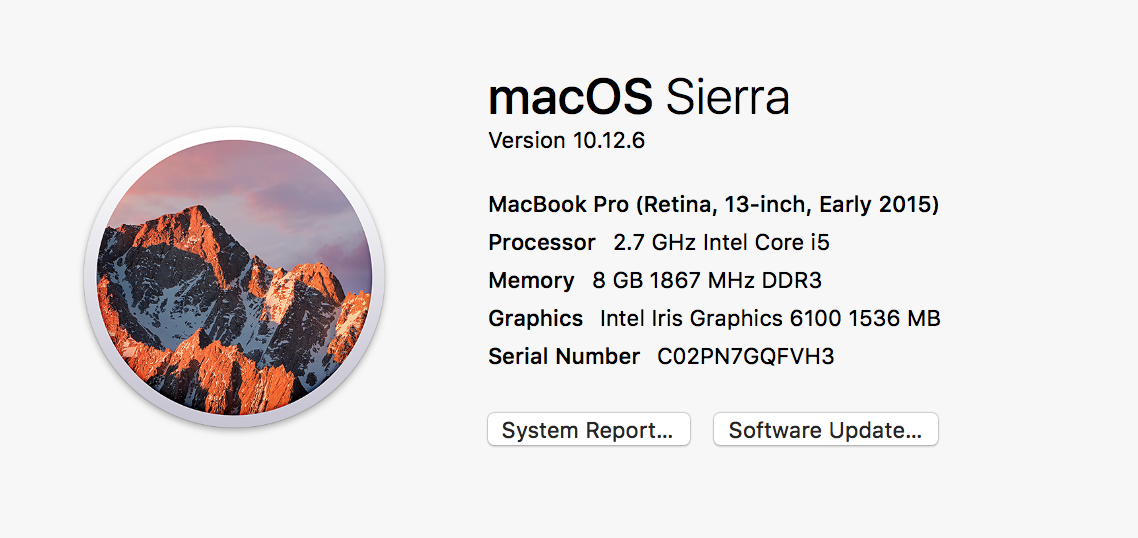

Generally:

- Consider storing your data in a relational database.
- Use HDF5 (https://www.h5py.org/) if you need to operate on the entire data set.
- Before importing or downloading, take a sample of your larger data set, approximating the total data.
- Consider a distributed computing environment like Hadoop, Starcluster, or Spark (There are even more options and considerations for these, but we will cover them in the future).


<a id='describe'></a>

### Summarizing Data with `.describe()`

---

The ```.describe()``` function is useful for taking a quick look at your data. It returns some basic descriptive statistics.

For our example, use the ```.describe()``` function on only the ```crack-use``` column.

In [ ]:
drug['crack-use'].describe()

You can also use it on multiple columns, such as ```crack-use``` and ```alcohol-frequency```.

In [ ]:
drug[['crack-use','alcohol-frequency']].describe()

```.describe()``` gives us the following statistics:

- **Count**, which is equivalent to the number of cells (rows).
- **Mean**, or, the average of the values in the column.
- **Std**, which is the standard deviation.
- **Min**, a.k.a., the minimum value.
- **25%**, or, the 25th percentile of the values.
- **50%**, or, the 50th percentile of the values ( which is the equivalent to the median).
- **75%**, or, the 75th percentile of the values.
- **Max**, which is the maximum value.

<img src="https://snag.gy/AH6E8I.jpg">

There are also built-in math functions that will work on all columns of a DataFrame at once, as well as subsets of the data.

For example, I can use the ```.mean()``` function on the ```drug``` DataFrame to get the mean for every column.

In [ ]:
drug.mean()

<a id='independent_practice'></a>

### Independent Practice

---

Now that we know a little bit about basic DataFrame use, let's practice on a new data set.

> Pro tip: When your cursor is in a string, you can use the "tab" key to browse file system resources and get a relative reference for the files that can be loaded in Jupyter notebook. Remember, you have to use your arrow keys to navigate the files populated in the UI. 

<img src="https://snag.gy/IlLNm9.jpg">

1. Find and load the `diamonds` data set into a DataFrame (in the `datasets` directory).
2. Print out the columns.
3. What does the data set look like in terms of dimensions?
4. Check the types of each column.
  a. What is the most common type?
  b. How many entries are there?
  c. How much memory does this data set consume?
5. Examine the summary statistics of the data set.

In [3]:
csv_file = "../datasets/diamonds/diamonds.csv"
diamonds = pd.read_csv(csv_file)

<a id='indexing'></a>

### `pandas` Indexing 

---

More often than not, we want to operate on or extract specific portions of our data. When we perform indexing on a DataFrame or Series, we can specify a certain section of the data.

`pandas` has three properties you can use for indexing:

- **`.loc`** indexes with the _labels_ for rows and columns.
- **`.iloc`** indexes with the _integer positions_ for rows and columns.


To help clarify these differences, let's first reset the row labels to letters using the ```.index``` attribute:

In [ ]:
new_index_values = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q']
drug.index=new_index_values


In [ ]:
drug.head()

Using the **`.loc`** indexer, we can pull out rows **B through F** and the **`marijuana-use` and `marijuana-frequency`** columns.

In [ ]:
subset = drug.loc[['B','C','D','E','F'], ['marijuana-use','marijuana-frequency']]

In [ ]:
subset

We can do the same thing with the **`.iloc`** indexer, but we have to use integers for the location.

In [ ]:
subset = drug.iloc[[1,2,3,4,5], [4,5]]

In [ ]:
subset

If you try to index the rows or columns with integers using **`.loc`**, you will get an error.

In [ ]:
# subset.loc[0,:]

Note that you can  reorder the columns just by reordering the indices you enter when you perform the indexing operation!

In [ ]:
subset.iloc[:, [1,0]]

In [ ]:
subset

While we created an index earlier, we can also use a column to set an index.

In [ ]:
drug.index = drug['age']

drug.head()

Is age the best feature to use as an index?  

If it isn't we can use the `df.reset_index()` to reset our index.

In [ ]:
drug.reset_index(drop=True, inplace=True)
drug.head()

<a id='creating_dataframes'></a>

### Creating DataFrames

---

The simplest way to create your own DataFrame without importing data from a file is to give the ```pd.DataFrame()``` instantiator a dictionary.

In [ ]:
mydata = pd.DataFrame({'Letters':['A','B','C'], 'Integers':[1,2,3], 'Floats':[2.2, 3.3, 4.4]})

In [ ]:
mydata

As you might expect, the dictionary needs to have lists of values that are all the same length. The keys correspond to the names of the columns, and the values correspond to the data in the columns.

<a id='dtypes'></a>

### Examining Data Types

---

`pandas` comes with a useful property for looking solely at the data types of your DataFrame columns. Use ```.dtypes``` on your DataFrame:

In [ ]:
mydata.dtypes

This will show you the data type of each column. Strings are stored as a type called "object," as they are not guaranteed to take up a set amount of space (strings can be any length).

<a id='renaming_assignment'></a>

### Renaming and Assignment

---

`pandas` makes it easy to change column names and assign values to your DataFrame.

Say, for example, we want to change the column name `Integers` to `int`:

In [ ]:
mydata.rename(columns={mydata.columns[1]:'int'}, inplace=True) # inplace = True updates mydata
print(mydata.columns)

In [ ]:
mydata

If you want to change every column name, you can just assign a new list to the ```.columns``` property.

In [ ]:
mydata.columns = ['A','B','C']
print(mydata.head())

We can assign values using the indexing operations we've already learned.

Let's change the newly renamed "B" column at row index 1 to be 100.

In [ ]:
mydata.loc[1, 'B'] = 100
print(mydata.head())

Alternatively, we can assign multiple values at once with lists.

In [ ]:
mydata.loc[:, 'A'] = [0,0,0]
print(mydata.head())

mydata.loc[0, ['B','C']] = [-1000, 'newstring']
print(mydata.head())

<a id='basic_plotting'></a>

### Basic Plotting Using DataFrames

---

DataFrames also come with some basic convenience functions for plotting data. First, import `matplotlib` and set it to run "inline" in your notebook.

In [ ]:
import matplotlib.pyplot as plt

%matplotlib inline

Using our ```drug``` DataFrame once again, use the ```.plot()``` function to plot the **`age`** columns against the **`marijuana-use`** column.

In [ ]:
drug.plot(x='age', y='marijuana-use')

The ```.hist()``` function will create a histogram for a column's values.

In [ ]:
drug.hist('marijuana-use')

<a id='filtering'></a>

### Filtering Logic

---

One of the most powerful features of DataFrames is the ability to use logical commands to filter data.

Subset the ```drug``` data for only the rows in which `marijuana-use` is greater than 20.

In [ ]:
drug[drug['marijuana-use'] > 20]

The ampersand sign can be used to subset where multiple conditions need to be met for each row. 

Subset the data for `marijuana-use` greater than 20 like before, but now, also include where the n is greater than 4,000.

In [ ]:
drug[(drug['marijuana-use'] > 20) & (drug.n > 4000)]

## Independent Practice

With our drug dataset already loaded, let's explore our dataset a bit more thoroughly to gain some familiarity with beginning exploratory analysis.

In [4]:
drug = pd.read_csv('../datasets/drug-use-by-age.csv')

### 1.  Identify which variable distributions are skewed left or right.

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
drug.plot(subplots=True, figsize=(20,40))
plt.show()

### 2. Select only data for "marijuana-frequency" when "age" is "30-34".

In [ ]:
mask = (drug['age']=="30-34")
drug[mask][['age','marijuana-frequency']]

### 2.A Can you select a range of values for age?  Why or why not?
ie:  age > 17 but < 21

In [ ]:
type(drug['age'][0])

### 3. Select only rows with index 5-10, for variables / columns "crack-use" and "crack-frequency"

In [ ]:
drug.loc[5:10,"crack-frequency"]

### 4. Select the columns by numeric offset 2-5, rows with numeric index 3-7

In [ ]:
drug.iloc[3:7,2:5]

### 5. Select a subset of data using 3 masked conditions.

ie: "variable" > 20 and "variable 2" != 23 and "variable" > -2

In [ ]:
drug.describe()

In [ ]:
col = drug.columns
mask = (drug['alcohol-use']>20)&(drug['alcohol-frequency']!=23)&(drug['cocaine-use']>-2)

In [ ]:
drug[mask]

<a id='review'></a>

### Review

---

 - What should we do with a data set when we first acquire it?
 - What's important to consider when first looking at a data set? 
 - What are some common problems we can run into with new data?
 - What are some common operations we can run with DataFrames?
 - How do we slice? Index? Filter?